author: Piotr Karaś

# One-Dimensional Transport of a Contaminant

### Overview

In this model, we explore the transport of a contaminant within a one-dimensional medium. The contaminant spreads due to both diffusion and advection processes. The model is particularly useful for understanding how a pollutant, introduced at a single point, disperses over time.

### Governing Dynamics

The behavior of the concentration $$ c(x, t) $$ is dictated by the advection-diffusion equation:

$$
\frac{\partial c}{\partial t} = D\,\frac{\partial^2 c}{\partial x^2} - U\,\frac{\partial c}{\partial x},
$$

where:
- $D$ [m²/s]: Diffusion coefficient, which governs the rate of spreading due to molecular motion.
- $U$ [m/s]: Advection velocity, which determines the rate at which the bulk fluid carries the contaminant.

### Analytical Solution

For an instantaneous point-source release, the solution (or Green’s function) is:

$$
c(x,t) = \frac{M}{A\sqrt{4\pi D t}}\,\exp\!\left[-\frac{(x-Ut)^2}{4Dt}\right],
$$

with the following parameters:
- $M$ [kg]: Total mass of the contaminant.
- $A$ [m²]: Cross-sectional area across which the contaminant is distributed.

This analytic solution yields a Gaussian concentration profile that both shifts in the direction of the flow (due to advection) and broadens over time (as a result of diffusion).

### Units and Graphical Representation

- **Position (x-axis):** Measured in meters (m)
- **Concentration (y-axis):** Measured in kilograms per cubic meter (kg/m³)
- **Time Snapshots:** The evolution of the plume is captured at specific time intervals (seconds, s).


In [37]:
import numpy as np
import pint
from matplotlib import pyplot as plt
from open_atmos_jupyter_utils import show_plot

si = pint.UnitRegistry()
si.setup_matplotlib()

In [38]:
M = 1 * si.kg          # Total contaminant mass [kg]
A = 1 * si.meter**2    # Cross-sectional area [m^2]
D = 0.1 * si.meter**2 / si.second  # Diffusion coefficient [m^2/s]
U = 1.0 * si.meter / si.second     # Advection velocity [m/s]

In [39]:
def c(x, t):
    X, T = np.meshgrid(x.magnitude, t.magnitude)
    X = X * x.units
    T = T * t.units
    return (
        M * X * np.exp(-((U * T - X) ** 2) / (4 * D * T))
        / ((A * 2 * np.sqrt(np.pi * D)) * T ** 1.5)
    )

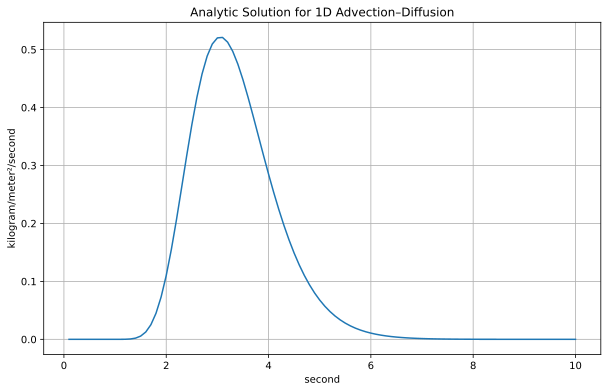

In [40]:
x = np.linspace(0, 10, 300) * si.meter
t = np.linspace(0.1, 10, 100) * si.second

c_values = c(x, t)

fig = plt.figure(figsize=(10, 6))
plt.plot(t, c_values[:, 100])
plt.title("Analytic Solution for 1D Advection–Diffusion")
plt.grid()
show_plot(fig=fig)